In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# Classification Problem

Below is the example of classification problem with Decision Tree. I will use __Iris flower dataset__ from sklearn.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris(as_frame = True)

In [ ]:
print(f'Features shape: {iris_data.data.shape}')
print(f'Target shape: {iris_data.target.shape}')

Features shape: (150, 4)
Target shape: (150,)


In [ ]:
iris_data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_data.target.unique()

array([0, 1, 2])

In [ ]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_data.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [ ]:
iris_data.data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
# I want to plot the data, but I need to join the data into a DataFrame
iris_df = iris_data.data.join(iris_data.target)

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

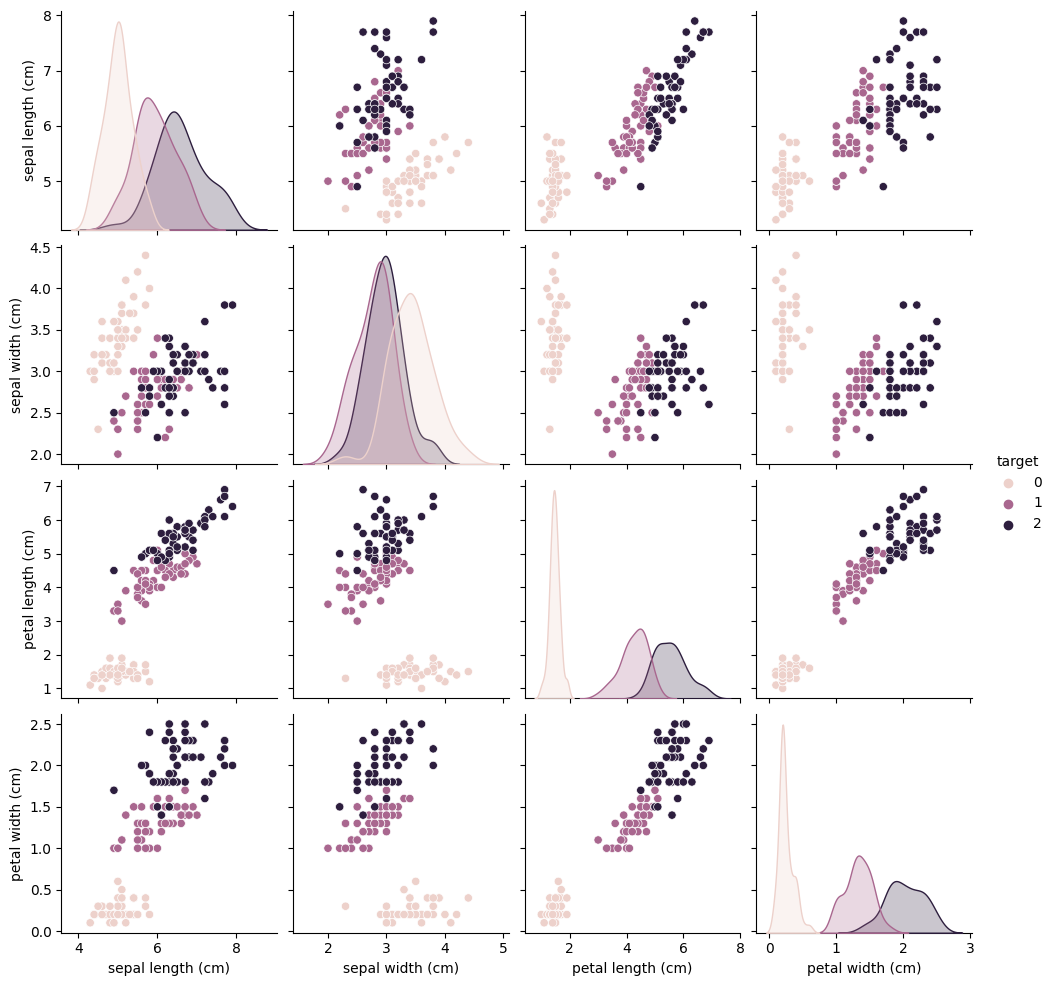

In [ ]:
sns.pairplot(iris_df, hue='target')

<Axes: >

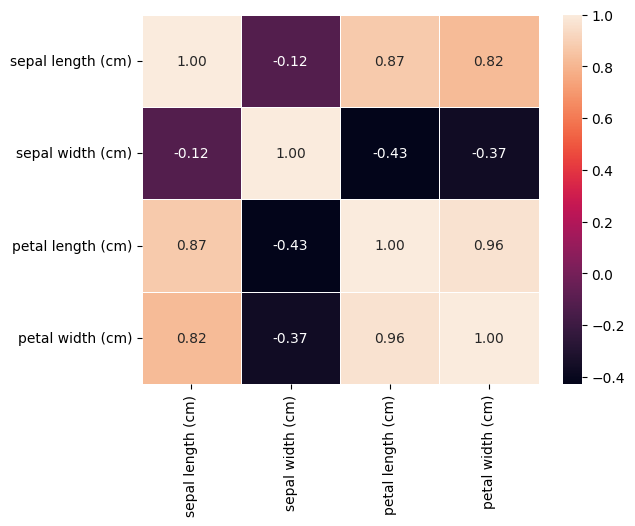

In [ ]:
feat_corr = iris_data.data.corr()

sns.heatmap(feat_corr, annot = True, linewidths=.5, fmt='.2f')

## Split dataset

Because we use dataset from sklearn, there is already a feature for scaling the data, hence I will proceed to split the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = iris_data.data.values
y = iris_data.target.values

In [ ]:
# Normalize the data
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Train shape: {X_train.shape, y_train.shape}')
print(f'Test shape: {X_test.shape, y_test.shape}')

Train shape: ((105, 4), (105,))
Test shape: ((45, 4), (45,))


## Train and Predict The Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.90909091, 1.        , 1.        , 0.72727273, 0.81818182,
       1.        , 1.        , 0.8       , 1.        , 0.9       ])

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= -0.743\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 0.564\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 0.527\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 0.725\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 0.678\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\ncl

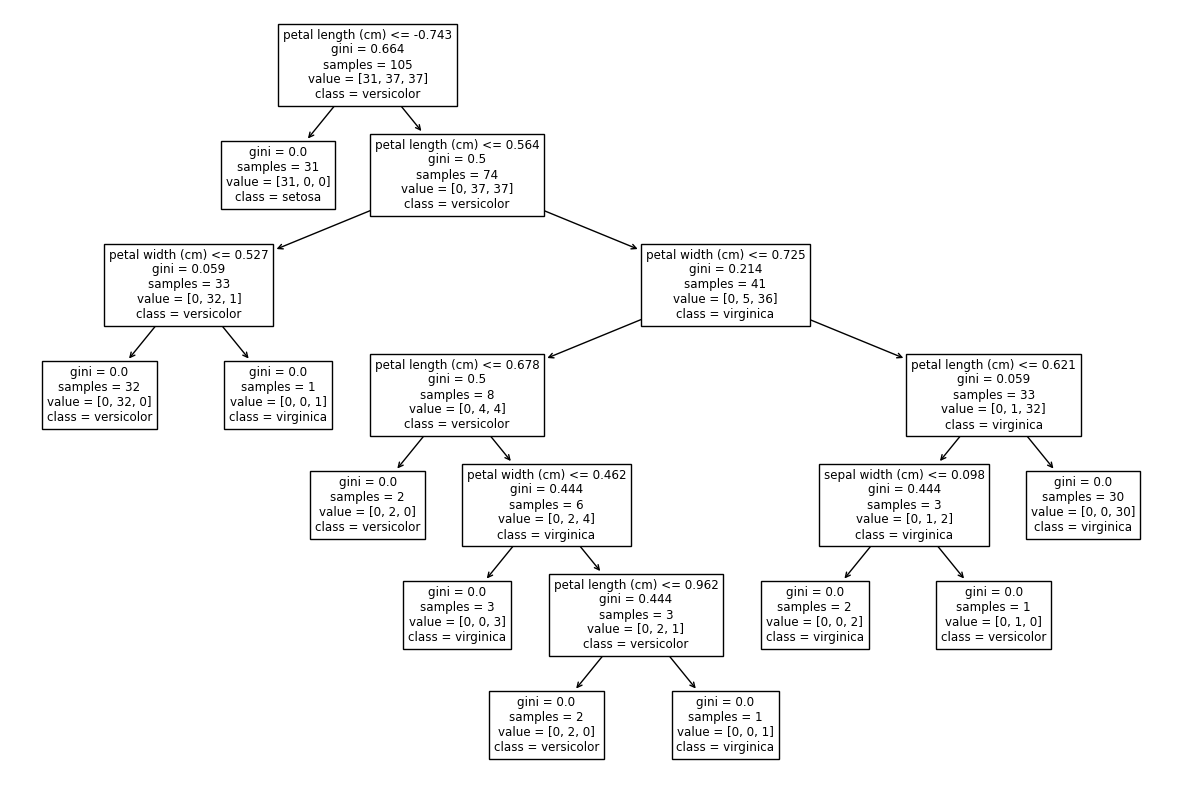

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names = iris_data.feature_names, class_names = iris_data.target_names)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

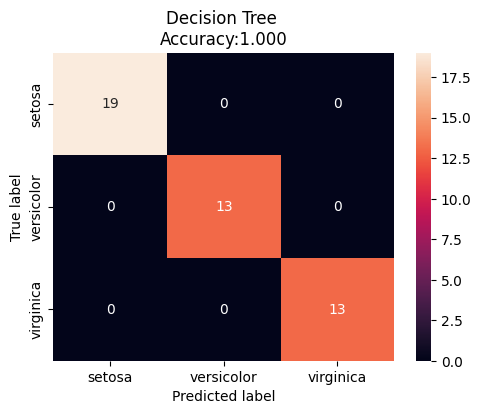

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Regression Problem

For these type of problem, I will use **diabetes** dataset from sklearn

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diab_data = load_diabetes(as_frame = True)

In [ ]:
print(f'Features shape: {diab_data.data.shape}')
print(f'Target shape: {diab_data.target.shape}')

Features shape: (442, 10)
Target shape: (442,)


In [ ]:
diab_data.data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
diab_data.target.unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [ ]:
diab_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diab_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
diab_data.target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [ ]:
diab_data.data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [ ]:
# I want to plot the data, but I need to join the data into a DataFrame
diab_df = diab_data.data.join(diab_data.target)

In [ ]:
diab_df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


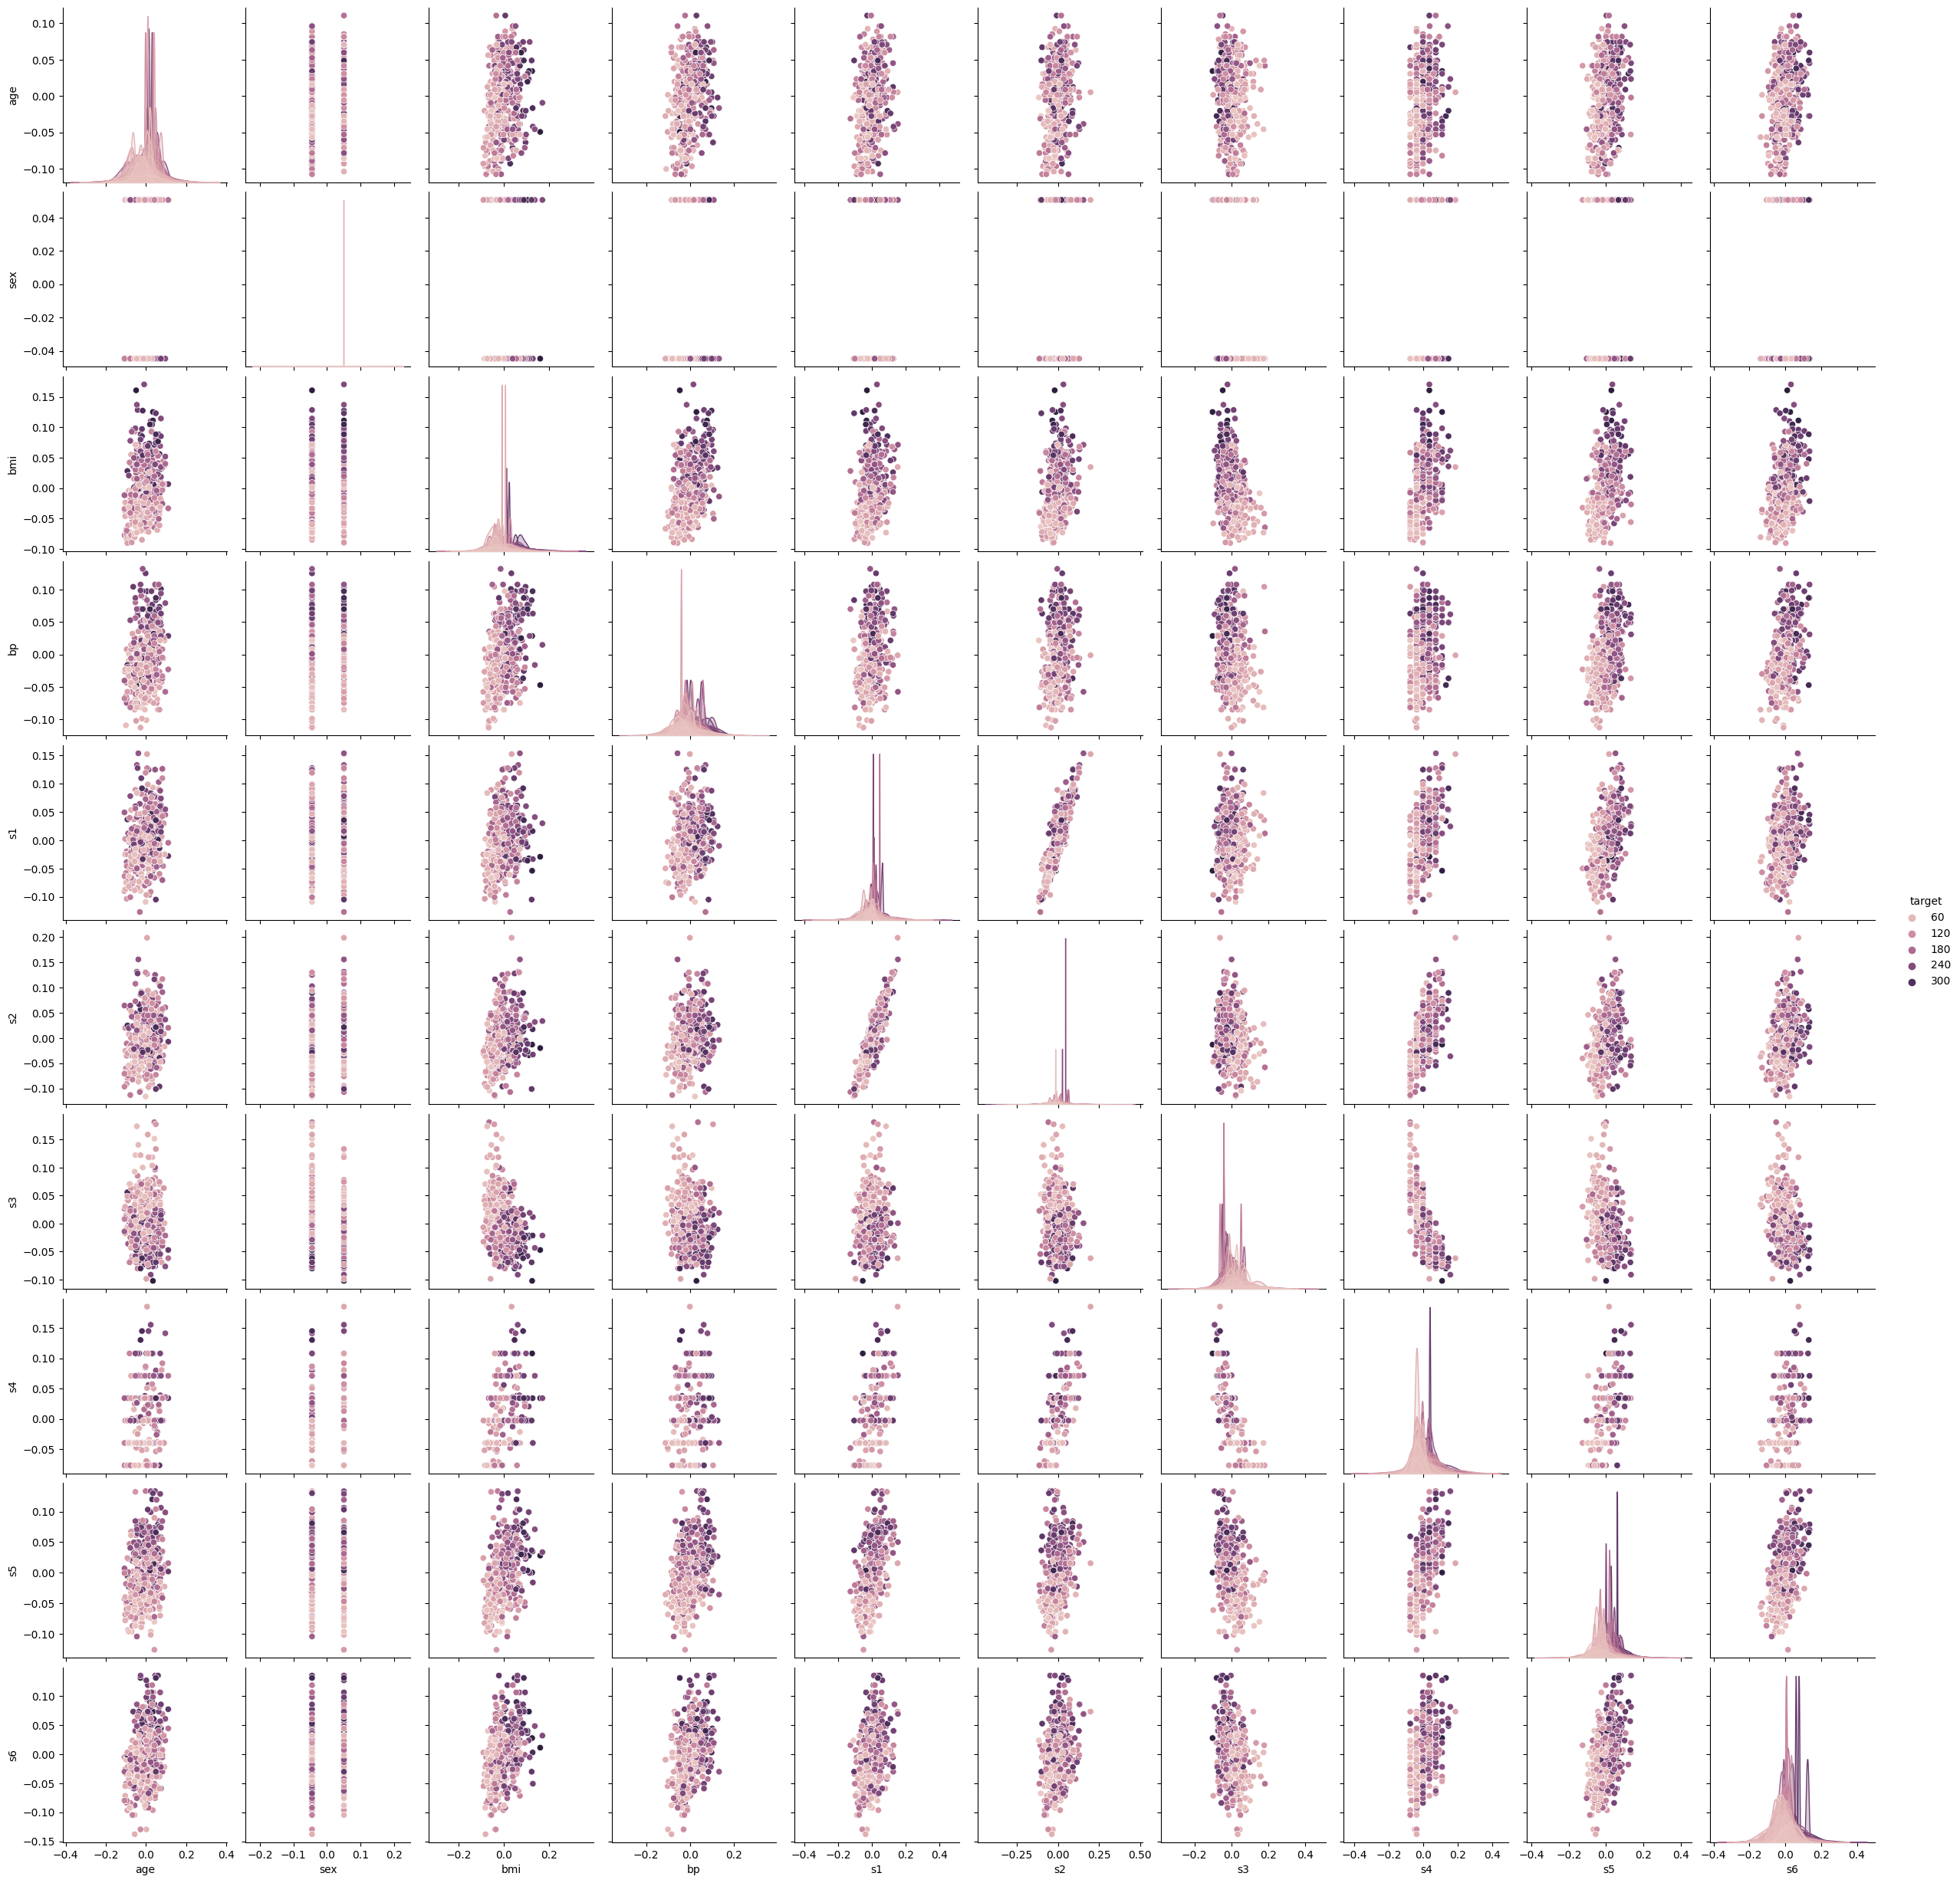

In [ ]:
sns.pairplot(diab_df, hue='target')

<Axes: >

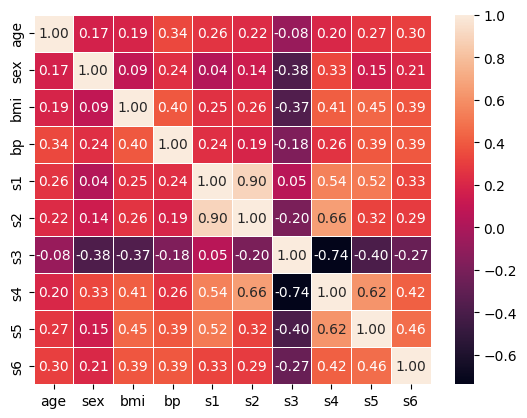

In [ ]:
feat_corr = diab_data.data.corr()

sns.heatmap(feat_corr, annot = True, linewidths=.5, fmt='.2f')

## Split The Dataset

In [ ]:
X = diab_data.data.values
y = diab_data.target.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Train shape: {X_train.shape, y_train.shape}')
print(f'Test shape: {X_test.shape, y_test.shape}')

Train shape: ((309, 10), (309,))
Test shape: ((133, 10), (133,))


## Train and Predict The Data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
reg = DecisionTreeRegressor(criterion = 'poisson', random_state = 42)

In [ ]:
cross_val_score(reg, X_train, y_train, cv=10, scoring = 'neg_root_mean_squared_error')

array([-87.34543953, -72.66849164, -95.25365119, -87.16206633,
       -66.48429356, -73.01678994, -68.48569429, -78.74786223,
       -70.94045663, -73.8198257 ])

In [ ]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', random_state=42)

[Text(0.5905160053838951, 0.9722222222222222, 'bmi <= 0.005\npoisson = 20.255\nsamples = 309\nvalue = 153.903'),
 Text(0.33214975421348314, 0.9166666666666666, 's5 <= 0.014\npoisson = 14.849\nsamples = 183\nvalue = 118.355'),
 Text(0.1819493211610487, 0.8611111111111112, 's5 <= -0.043\npoisson = 12.121\nsamples = 138\nvalue = 102.855'),
 Text(0.07818352059925093, 0.8055555555555556, 's1 <= -0.039\npoisson = 8.566\nsamples = 42\nvalue = 78.952'),
 Text(0.05599250936329588, 0.75, 's1 <= -0.048\npoisson = 9.279\nsamples = 24\nvalue = 94.792'),
 Text(0.040074906367041196, 0.6944444444444444, 's2 <= -0.061\npoisson = 6.306\nsamples = 19\nvalue = 80.211'),
 Text(0.029213483146067417, 0.6388888888888888, 'age <= 0.013\npoisson = 6.911\nsamples = 12\nvalue = 91.25'),
 Text(0.026217228464419477, 0.5833333333333334, 's5 <= -0.054\npoisson = 4.262\nsamples = 11\nvalue = 83.364'),
 Text(0.01647940074906367, 0.5277777777777778, 's2 <= -0.077\npoisson = 2.676\nsamples = 9\nvalue = 91.333'),
 Text(0.

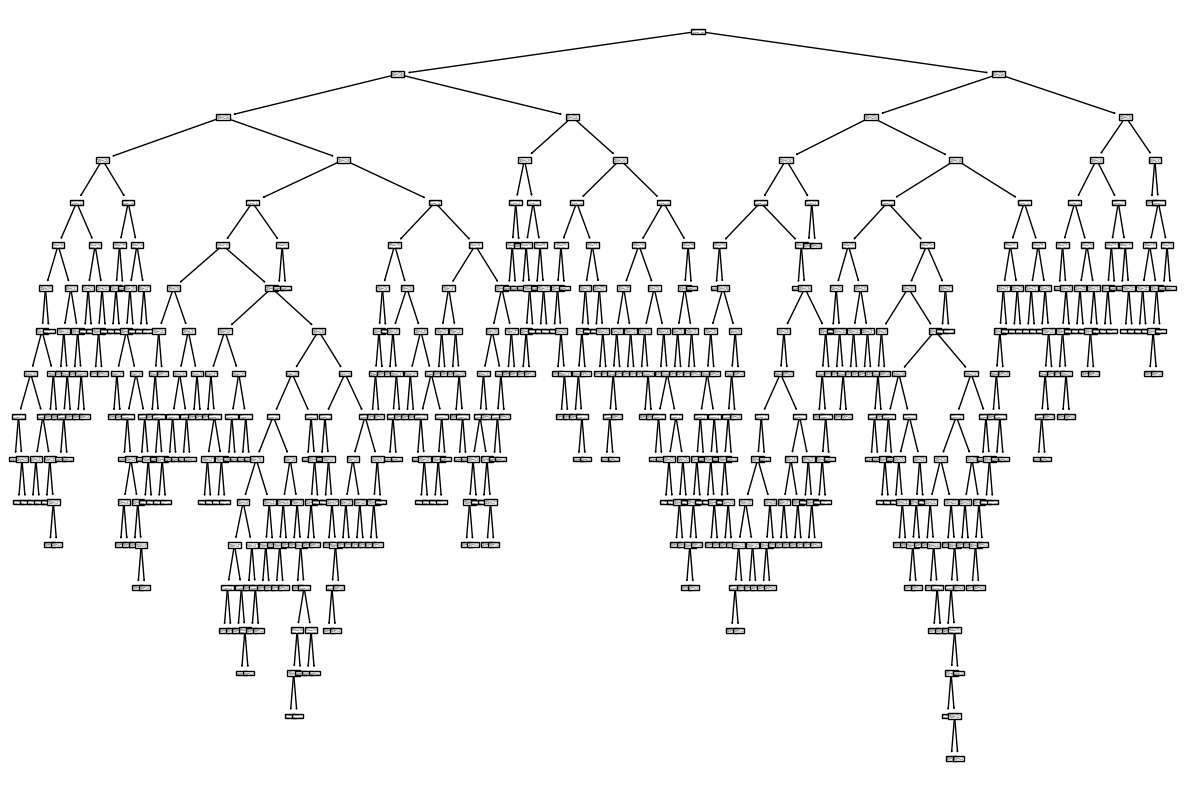

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(reg, feature_names = diab_data.feature_names)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared = False)}')

RMSE Score: 71.58947291033053
